/tmp/ipykernel_1822571/1954381147.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 2*np.log10(H_gauss), label=f'Gaussian(L={win_len}, σ={sigma})')


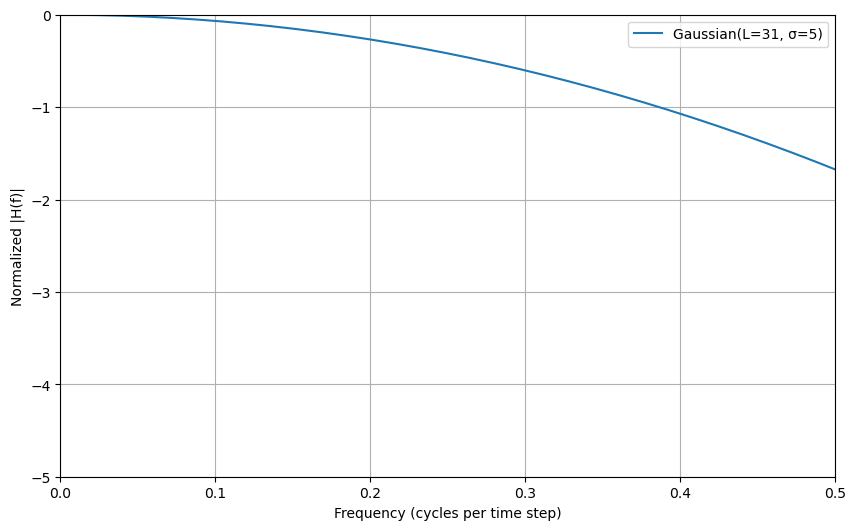

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(L, sigma):
    n = np.arange(L) - (L - 1) / 2
    g = np.exp(-(n**2) / (2 * sigma**2))
    return g / g.sum()

d = 0.125
win_len = 31
L = win_len / d
# sigma = 3.0   # example
sigma = 5

gauss = gaussian_kernel(L, sigma)

Nfft = 1000

H_gauss = np.abs(np.fft.fftshift(np.fft.fft(gauss, Nfft)))

freq = np.fft.fftshift(np.fft.fftfreq(Nfft, d=d))

# Normalize
H_gauss /= H_gauss.max()

plt.figure(figsize=(10,6))
# plt.plot(freq, np.log10(H_hann), label=f'Hann(L={win_len}), {1/d}X sam rate')
plt.plot(freq, 2*np.log10(H_gauss), label=f'Gaussian(L={win_len}, σ={sigma})')

# for sigma in [3, 5, 7]:
#     gauss = gaussian_kernel(L, sigma)
#     H_gauss = np.abs(np.fft.fftshift(np.fft.fft(gauss, Nfft)))
#     H_gauss /= H_gauss.max()
#     plt.plot(freq, np.log10(H_gauss), label=f'Gaussian(L={win_len}, σ={sigma}, {1/d}X sam rate)')

# for L in [11, 15,21]:
#     hann = np.hanning(L)
#     H_hann = np.abs(np.fft.fftshift(np.fft.fft(hann, Nfft)))
#     H_hann /= H_hann.max()
#     plt.plot(freq, np.log10(H_hann), label=f'Hann(L={L})')

plt.xlim(0, 0.5)
plt.ylim(-5, 0)

plt.xlabel("Frequency (cycles per time step)")
plt.ylabel("Normalized |H(f)|")
# plt.title("Frequency Response: Hann vs Gaussian")
plt.legend()
plt.grid(True)
plt.show()


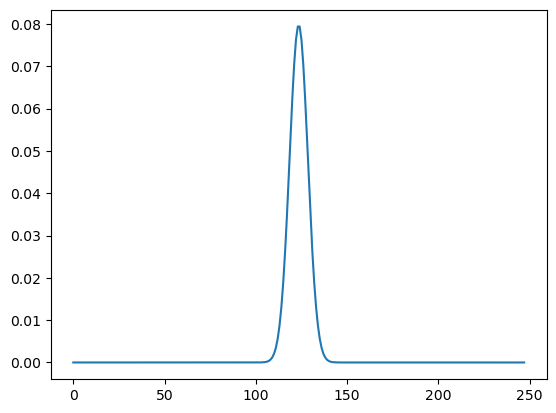

In [20]:
plt.plot(gauss)

In [21]:
1/0.08

12.5

In [1]:
import sys
from pathlib import Path
src_utils_path = Path("../../src/")
sys.path.append(str(src_utils_path))
import yaml  
from data_prepare.dataset import load_train_data, load_val_data, load_test_data
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr 

In [2]:
with open(f'./old_yaml/best_config_sm11_resTrue.yaml', "r") as f:
    config = yaml.safe_load(f)

# train_loader = load_train_data(config, dataset_type=config["dataset_type"])
val_loader = load_val_data(config, dataset_type=config["dataset_type"])

with open(f'./old_yaml/best_config_sm11_resFalse.yaml', "r") as f:
    config = yaml.safe_load(f)

# train_loader = load_train_data(config, dataset_type=config["dataset_type"])
val_loader_false = load_val_data(config, dataset_type=config["dataset_type"])


<class 'bool'>
Input shape: (2061, 1, 96, 180)
True
Date start: 2010-04-06T00:00:00.000000000, Date end: 2015-11-26T00:00:00.000000000
<class 'bool'>
Input shape: (2061, 1, 96, 180)
False
Date start: 2010-04-06T00:00:00.000000000, Date end: 2015-11-26T00:00:00.000000000


In [3]:
data_iter = iter(val_loader)
inputs, targets = next(data_iter)

data_iter = iter(val_loader_false)
inputs_false, targets = next(data_iter)

Input shape: torch.Size([1, 96, 180]), Target shape: torch.Size([72])
Input time: 2010-04-06T00:00:00.000000000, Target time: 2010-04-06T00:00:00.000000000
Input shape: torch.Size([1, 96, 180]), Target shape: torch.Size([72])
Input time: 2010-04-06T00:00:00.000000000, Target time: 2010-04-06T00:00:00.000000000


In [4]:
inputs[0].squeeze()

tensor([[-1.2310e-02, -2.4649e-01, -2.0300e-01,  ...,  6.0733e-02,
          1.3264e-01,  6.0167e-02],
        [-3.7541e-01, -2.8903e-01, -2.2933e-01,  ..., -1.9095e-01,
         -2.8330e-01, -3.2936e-01],
        [ 1.4706e-01,  2.1799e-01,  4.6718e-01,  ..., -2.0583e-01,
         -1.4626e-01,  4.0108e-04],
        ...,
        [ 2.8367e-01,  3.0209e-01,  1.6671e-01,  ...,  4.0286e-02,
          1.1004e-01,  1.9685e-01],
        [ 5.1926e-01,  2.1160e-01,  7.0709e-02,  ...,  1.6736e-01,
          2.4442e-01,  3.8184e-01],
        [-6.1836e-01, -4.2133e-01, -3.0603e-01,  ..., -4.0199e-01,
         -5.4459e-01, -5.8148e-01]])

In [5]:
inputs_false[0].squeeze()

tensor([[0.9396, 0.5692, 0.5457,  ..., 1.2242, 1.2279, 1.0837],
        [0.9990, 0.6486, 0.5767,  ..., 1.2683, 1.2661, 1.1326],
        [1.0563, 0.7176, 0.5820,  ..., 1.3155, 1.3067, 1.1815],
        ...,
        [0.6359, 0.5881, 0.5112,  ..., 0.6497, 0.6741, 0.6550],
        [0.6691, 0.6115, 0.5252,  ..., 0.5714, 0.6042, 0.6366],
        [0.6578, 0.5926, 0.4974,  ..., 0.4959, 0.5254, 0.5916]])

In [6]:
olr3 = inputs[0].squeeze().detach().cpu().numpy()
olr5 = inputs_false[0].squeeze().detach().cpu().numpy()

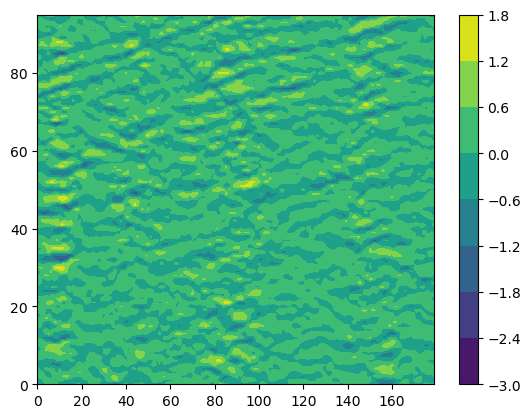

In [75]:
plt.contourf(olr3)
plt.colorbar()

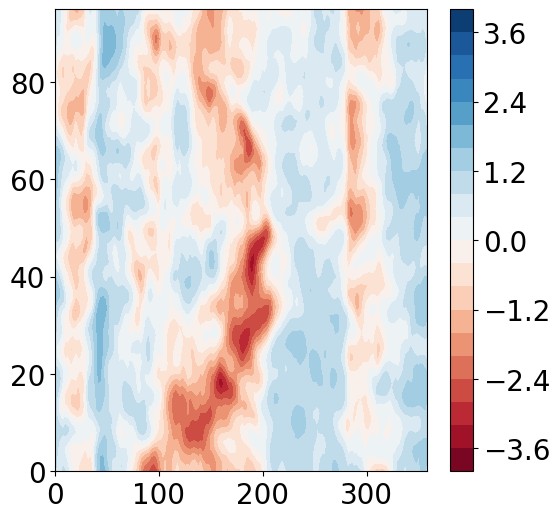

In [17]:
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.contourf(np.arange(0,360,2), np.arange(0,96), olr5, cmap='RdBu', levels=np.linspace(-4,4,21))
plt.colorbar()